In [40]:
import os
import warnings
warnings.filterwarnings('ignore')
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight') 
# Above is a special style template for matplotlib, highly useful for visualizing time series data
%matplotlib inline
from pylab import rcParams
from plotly import tools
import chart_studio.plotly as py
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.figure_factory as ff
import statsmodels.api as sm
from numpy.random import normal, seed
from scipy.stats import norm
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.arima_model import ARIMA
import math
from sklearn.metrics import mean_squared_error
import altair as alt

In [68]:
df = pd.read_csv('/home/jupyter/charliemacuject/pharma_reports/data/dme.csv')
df.head()

,Unnamed: 0,id,CreatedDate,Laterality,visual_acuity,InjToday,InjNext,NextInt
0,0,19913,22/02/2017,Left,76.0,NaN,NaN,NaN
1,1,19913,09/03/2017,Left,76.0,Avastin,NaN,NaN
2,2,19913,22/03/2017,Left,76.0,NaN,NaN,NaN
3,3,19913,11/04/2017,Left,76.0,Lucentis,Lucentis,4.0
4,4,19913,09/05/2017,Left,76.0,Lucentis,Lucentis,4.0


In [12]:
class ImportClean:
    
    def __init__(self, df):
        self.df = df
        
    def clean(self):
        cdf = self.df
        cdf.CreatedDate = pd.to_datetime(cdf.CreatedDate)
        cdf.drop(columns=['Unnamed: 0'], inplace=True)
        return cdf

In [13]:
df = pd.read_csv('/home/jupyter/charliemacuject/pharma_reports/data/dme.csv')
dataset = ImportClean(df)
df = dataset.clean()
df.head()

,id,CreatedDate,Laterality,visual_acuity,InjToday,InjNext,NextInt
0,19913,2017-02-22,Left,76.0,NaN,NaN,NaN
1,19913,2017-09-03,Left,76.0,Avastin,NaN,NaN
2,19913,2017-03-22,Left,76.0,NaN,NaN,NaN
3,19913,2017-11-04,Left,76.0,Lucentis,Lucentis,4.0
4,19913,2017-09-05,Left,76.0,Lucentis,Lucentis,4.0


In [39]:
import altair as alt

source = pdf

alt.Chart(source).mark_area(
    color="lightblue",
    interpolate='step-after',
    line=True
).encode(
    x='CreatedDate',
    y='visual_acuity'
)

alt.Chart(...)

In [27]:
id_list = df.id.unique()
num = np.random.choice(id_list)

In [30]:
pdf = df[df.id == num]
pdf.sort_values(by=['CreatedDate'], inplace=True)
pdf.dropna(subset=['visual_acuity'], inplace=True)
#pdf.set_index('CreatedDate', inplace=True)
#pdf.visual_acuity.asfreq('M').plot()
#plt.show()
pdf.visual_acuity

5818    65.0
5836    61.0
5820    61.0
5838    61.0
5821    65.0
5839    61.0
5823    65.0
5841    61.0
5824    65.0
5842    61.0
5822    65.0
5840    61.0
5843    61.0
5825    65.0
5845    65.0
5827    70.0
5844    61.0
5826    65.0
5828    70.0
5846    65.0
5831    76.0
5849    76.0
5833    65.0
5851    70.0
5835    65.0
5853    76.0
5834    65.0
5852    76.0
5848    70.0
5830    70.0
5847    65.0
5829    70.0
5832    76.0
5850    80.0
Name: visual_acuity, dtype: float64

In [70]:
class Visualise(ImportClean):
    
    def __init__(self, df):
        self.df = df
    
    def id_list(self):
        return list(self.df.id.unique())
    
    def freq_plot(self):
        df = self.df
        lst = self.id_list()
        id_num = np.random.choice(lst)
        pdf = df[df.id == id_num]
        pdf.sort_values(by=['CreatedDate'], inplace=True)
        pdf.dropna(subset=['visual_acuity'], inplace=True)
        source = pdf
        alt.Chart(source).mark_area(
            color="lightblue", interpolate='step-after',
            line=True
        ).encode(x='CreatedDate', y='visual_acuity')

In [71]:
df = pd.read_csv('/home/jupyter/charliemacuject/pharma_reports/data/dme.csv')
item = Visualise(df)
#lst = item.id_list()
#np.random.choice(lst)
item.freq_plot()

In [72]:
item.freq_plot()

In [78]:
pdf.sort_values(by=['CreatedDate'], inplace=True)
pdf.set_index('CreatedDate', inplace=True)
pdf['vision_SMA_4'] = pdf['visual_acuity'].rolling(window=4).mean()
pdf.head()

,id,Laterality,visual_acuity,InjToday,InjNext,NextInt,vision_SMA_4
CreatedDate,,,,,,,
2019-12-16,25593,Left,65.0,NaN,NaN,NaN,NaN
2019-12-16,25593,Right,61.0,NaN,NaN,NaN,NaN
2020-01-21,25593,Left,61.0,Eylea,Eylea,4.0,NaN
2020-01-21,25593,Right,61.0,Eylea,Eylea,4.0,62.0
2020-03-03,25593,Left,65.0,Eylea,Eylea,NaN,62.0


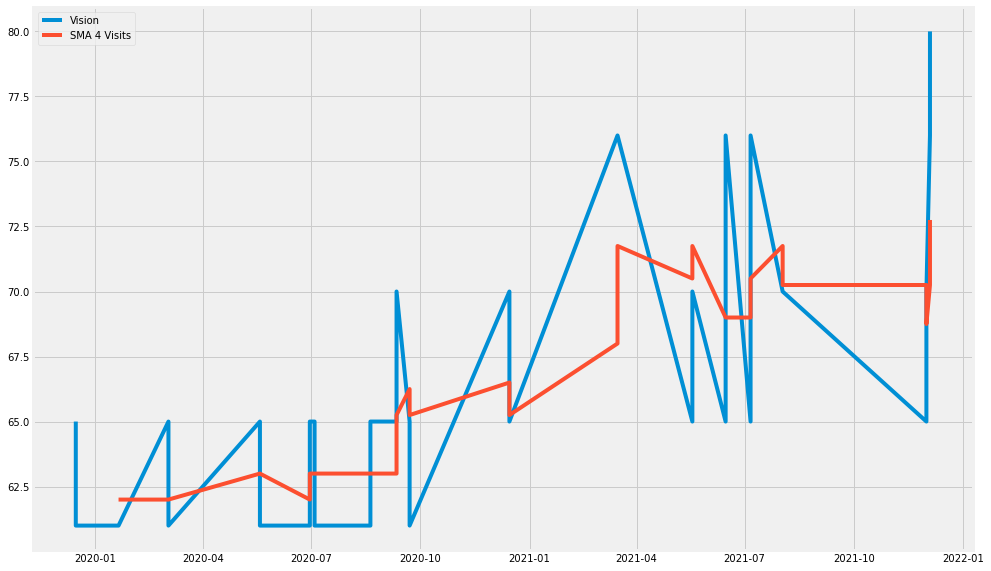

In [79]:
plt.figure(figsize=[15,10]);
plt.grid(True);
plt.plot(pdf['visual_acuity'],label='Vision');
plt.plot(pdf['vision_SMA_4'],label='SMA 4 Visits');
plt.legend(loc=2);

In [87]:
pdf['CMA_3'] = pdf['visual_acuity'].expanding(min_periods=3).mean()

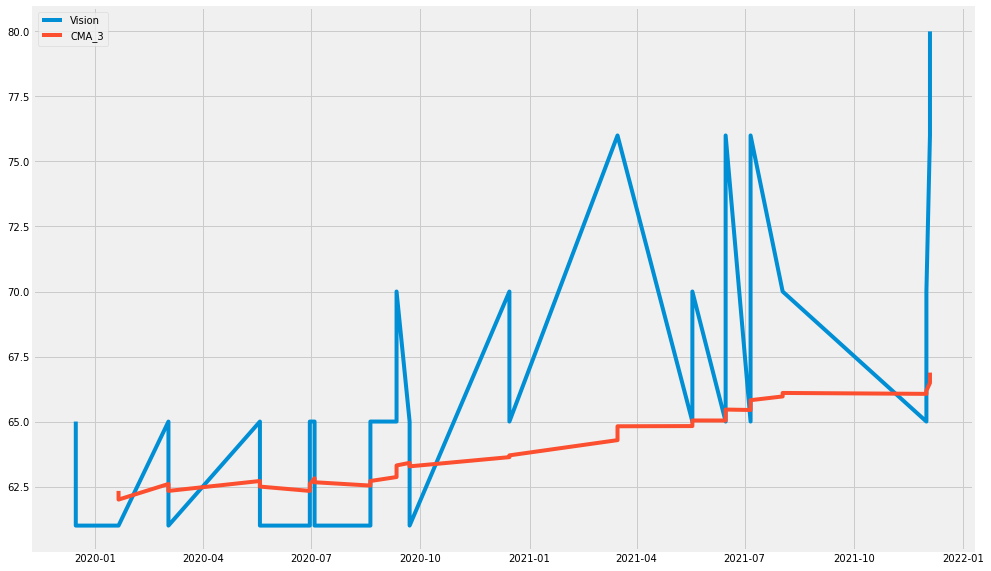

In [88]:
plt.figure(figsize=[15,10])
plt.grid(True)
plt.plot(pdf['visual_acuity'],label='Vision')
plt.plot(pdf['CMA_3'],label='CMA_3')
plt.legend(loc=2)

In [89]:
pdf['EMA'] = pdf['visual_acuity'].ewm(span=10, adjust=False).mean()

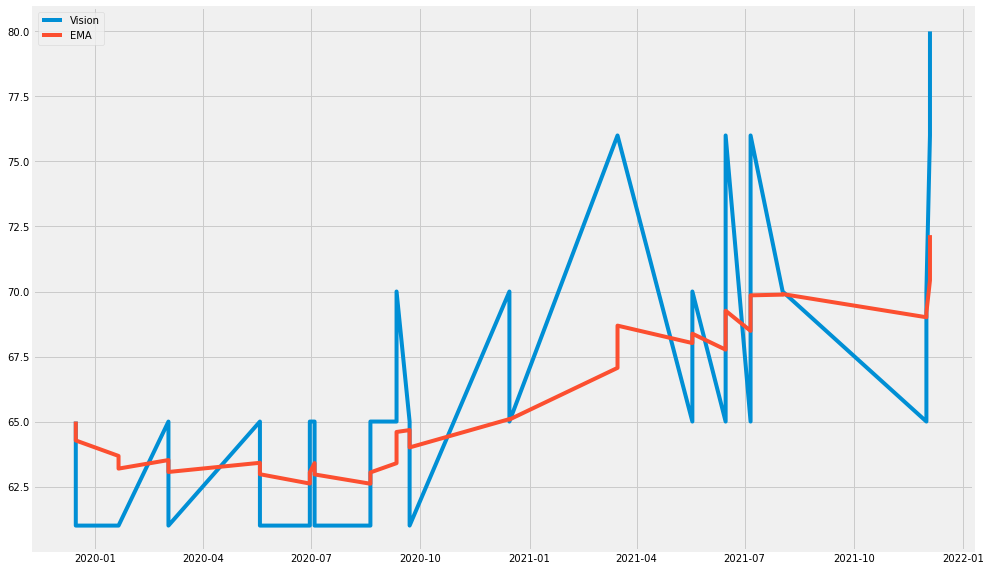

In [90]:
plt.figure(figsize=[15,10])
plt.grid(True)
plt.plot(pdf['visual_acuity'],label='Vision')
plt.plot(pdf['EMA'],label='EMA')
plt.legend(loc=2)